<a href="https://colab.research.google.com/github/riqx-code/CARscan/blob/main/Task_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Package Importing

Tried to use kaggle API, but faced some issues so  I used **Mount Drive** and imported the downloaded data.

Now lets import major libraries the we will use in the classifier building

In [3]:
# To build classifier
import tensorflow as tf
# ImageDataGenerator module used for image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# images are stored in arrays form , so to operate on then we need a array module
import numpy as np
# to get image parameters I use opencv
import cv2 as cv
# to import subject image in google colab I need this module
from google.colab import files
# to show evaluvation results
import matplotlib.pyplot as plt

## DATASET IMPORTING &  PREPROCESSING

Now lets create **Train & Test data generator** using **ImageDataGenarator**

In [ ]:
# we create train_data with normalisation of pixel values to float 0-1.0 by rescalling by factor 1.0/255
train_data = ImageDataGenerator(rescale = 1.0/255)
test_data = ImageDataGenerator(rescale = 1.0/255)

In [ ]:
# path of train and test(validate) folder in my colab environment 
path_train = '/content/drive/MyDrive/bcdamage/data1a/training'
path_test = '/content/drive/MyDrive/bcdamage/data1a/validation'

In [ ]:
# batch_size as we have arround 1800(train) + 500(test) images lets keep it as 50 
batch_sizes = 50

#target_size is tuple of output images from preprocessors , it's arbitary 
target_sizes = (200,200)

#class_mode is number of classes , here we are classifing into damaged or not so it is binary
class_modes = 'binary'

# Train & Test data generation

Training data generator

In [ ]:
train_gen = train_data.flow_from_directory('/content/drive/MyDrive/bcdamage/data1a/training',batch_size=50,class_mode='binary',target_size=(200, 200))

Found 1840 images belonging to 2 classes.


Testing data generator

In [ ]:
test_gen =  test_data.flow_from_directory('/content/drive/MyDrive/bcdamage/data1a/validation',batch_size=50,class_mode='binary',target_size=(200,200))

Found 460 images belonging to 2 classes.


# MODEL CREATION



1.   CONVOLUTION LAYER : it's the filter that extracts the feature from a image
2.   Max pooling : This process helps us in considering only pixels that sustained(enought activation value) after convolution.

So we use **CONVOLUTION LAYER** and **Max Pooling layer** as pair.

We are going to use 3 pairs of CONV2D and Max_pooling layers in hidden layers.Then a **flatenning layer** then we try to converg all the outputs using two **dense layers**.



***Layer Parameters***


1.   Convolution layer 1 :
          Kernal size = 16 x 16 
          strides = 3,3
          relu activation
          input = image of shape 200,200,3 : RGB
      Pooling Layer 1:
          size = 2,2

2.   Convolution layer 2 :
          Kernal size = 32 x 32 
          strides = 3,3
          relu activation
          input = size of Max_pooling 1
      Pooling Layer 2:
          size = 2,2

3.   Convolution layer 3 :
          Kernal size = 64 x 64 
          strides = 3,3
          relu activation
          input = size of Max_pooling 1
      Pooling Layer 3:
          size = 2,2

4. Flatten layer :

          input size = 23 x 23 x 64

          output size = 33856

5. Dense Layer 1 :

          converges 33856 tensors output to 512 tensor outputs

6. Dense Layer 2 :

          converges 512 tensors output to 1 class output

                  




In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

# Model Compilation

Compiling a model is adding a few process of operation how model will train itself. Arguments for compiler

1. optimizer : it helps in backtracking phase to change layer weights and biases

    we can use the following optimizers :

      ***SGD − Stochastic gradient descent optimizer***

      ***RMSprop − RMSProp optimizer***

      ***Adam − Adam optimizer***

      ***Adamax − Adamax optimizer from Adam***

      ***Nadam − Nesterov Adam optimizer***

      I prefered Adam optimizer as it's **faster**  , **good noise reception** and **optimized** compared to other.

2. Loss : It helps in calculation of error during backtracking 

      we have different types of loss function but for binary classification we generally prefer **Binary cross entropy**.

3. Metric : 
    It's a comparision function same as Loss , but we don't use it for training but we use this for evaluvation purposes.
      I'm using **'accuracy'** as the metric.


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

# Preparing the Model

We pass the data through the CNN , Number of times of forward and backward propagation = **epoch**.

steps_per_epoch : The quotient of total sample size / batch size 

here  1840/50 = 36

for testing = 460/50 = 9

In [ ]:
history = model.fit(
            train_gen, # pass in the training generator
            steps_per_epoch=36,
            epochs=15,
            validation_data=test_gen, # pass in the validation generator
            validation_steps=9,
            verbose=2
            )

Epoch 1/15
36/36 - 86s - loss: 0.3566 - accuracy: 0.8458 - val_loss: 0.4656 - val_accuracy: 0.7689 - 86s/epoch - 2s/step
Epoch 2/15
36/36 - 81s - loss: 0.2536 - accuracy: 0.9050 - val_loss: 0.4671 - val_accuracy: 0.7933 - 81s/epoch - 2s/step
Epoch 3/15
36/36 - 82s - loss: 0.1649 - accuracy: 0.9397 - val_loss: 0.4944 - val_accuracy: 0.8022 - 82s/epoch - 2s/step
Epoch 4/15
36/36 - 81s - loss: 0.0915 - accuracy: 0.9709 - val_loss: 0.5630 - val_accuracy: 0.7756 - 81s/epoch - 2s/step
Epoch 5/15
36/36 - 83s - loss: 0.0517 - accuracy: 0.9872 - val_loss: 0.6729 - val_accuracy: 0.7689 - 83s/epoch - 2s/step
Epoch 6/15
36/36 - 83s - loss: 0.0299 - accuracy: 0.9922 - val_loss: 0.7879 - val_accuracy: 0.7711 - 83s/epoch - 2s/step
Epoch 7/15
36/36 - 80s - loss: 0.0243 - accuracy: 0.9955 - val_loss: 0.7566 - val_accuracy: 0.7867 - 80s/epoch - 2s/step
Epoch 8/15
36/36 - 81s - loss: 0.0206 - accuracy: 0.9944 - val_loss: 0.8324 - val_accuracy: 0.7956 - 81s/epoch - 2s/step
Epoch 9/15
36/36 - 80s - loss: 0

# Complete Model Downloading

In [21]:
from tensorflow.keras.models import load_model

# save whole model

model.save('/content/drive/MyDrive/trained_model1/model.hdf5')

#new_model = keras.models.load_model('/content/drive/MyDrive/trained_model1/model.hdf5')

In [27]:
# weight saving

model.save_weights("/content/drive/MyDrive/trained_model1/weights1.hdf5")

# to use this we need proper architecture

# architecture saving 

json_string = model.to_json()

with open('/content/drive/MyDrive/trained_model1/archi.json','w') as f:
  f.write(json_string)

# to open json
path = '/content/drive/MyDrive/trained_model1/archi.json'
with open(path,'r') as g:
  loaded_json = g.read()
new_model = keras.models.model_from_json(loaded_json)

# Evaluvation

Text(0.5, 1.0, 'Loss in training and validation')

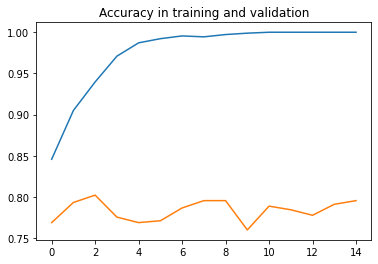

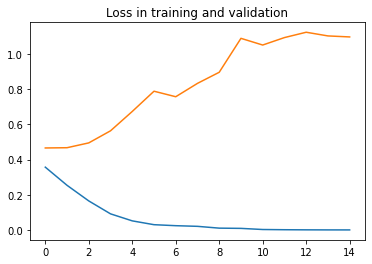

In [30]:
# get the metrics from history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) 

# plot accuracy with matplotlib
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and validation')
plt.figure()

# plot loss with matplotlib
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and validation')

In [35]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # prediction on the uploaded image
  path = '/content/' + fn # load the image on Colab
  img = tf.keras.utils.load_img(path, target_size=(200, 200)) # let's use load_img to scale it 
  
  # scaling process
  x = tf.keras.utils.img_to_array(img)
  x /= 255 
  x = np.expand_dims(x, axis=0)
  # flatten the output
  images = np.vstack([x])
  
  # prediction!
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0] > 0.5:
    print(fn + " not damaged!")
  else:
    print(fn + " damaged!")

Saving ncar2.jpg to ncar2.jpg
1/1 [==============================] - 0s 40ms/step
[1.]
ncar2.jpg not damaged!
